In [ ]:
!pip install scrublet

In [1]:
import scrublet as scr
import scipy.io as sp
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#read in the expression matrix and make sure that the dimensions are in cells x genes
mat = sp.mmread("UMI_count_filt.matrix")
mat

<138859x58347 sparse matrix of type '<class 'numpy.int64'>'
	with 117719642 stored elements in COOrdinate format>

In [4]:
#input the collision rate from the birthday problem into the expected doublet rate
scrub = scr.Scrublet(mat, expected_doublet_rate=0.03854)

In [5]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 19.9%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 0.0%
Elapsed time: 689.0 seconds


In [7]:
scrub.call_doublets(threshold=0.55)

Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 20.8%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 0.0%


array([False, False, False, ..., False, False, False])

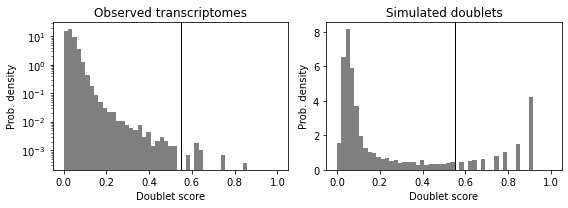

In [8]:
scrub.plot_histogram()[0].savefig("scrublet_histogram.png");

In [9]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.1))

print('Done.')

Running UMAP...
Done.


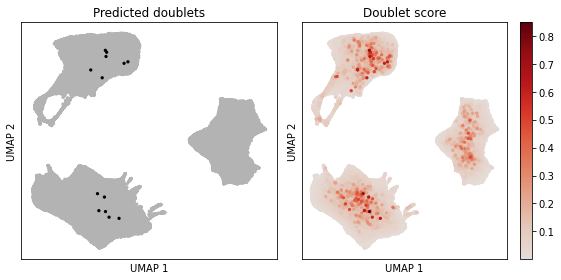

In [10]:
scrub.plot_embedding('UMAP', order_points=True)[0].savefig("UMAP_doublets.png");


In [12]:
np.savetxt(fname = "doublet_scores_EGFRi.txt", X = doublet_scores)
np.savetxt(fname = "predicted_doublets_EGFRi.txt", X = predicted_doublets)